   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

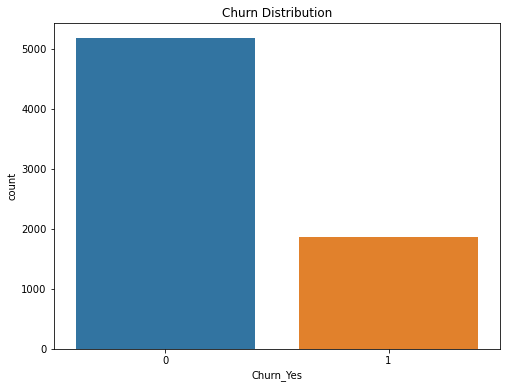

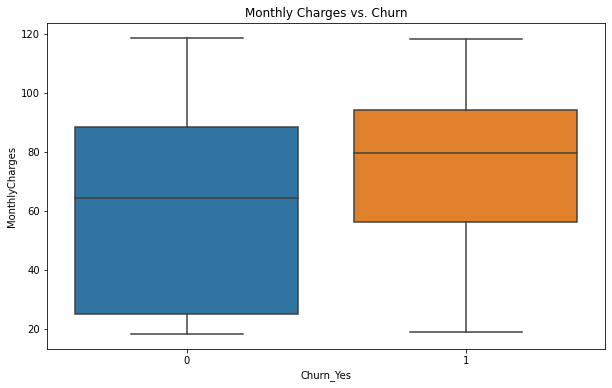

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=13602)


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Telco Customer Churn dataset
url = 'C:/Users/user/OneDrive/Desktop/Datasets/Telco-Customer-Churn.csv'
churn_df = pd.read_csv(url)

# Display the first few rows of the dataset
print(churn_df.head())

# Check for missing values
print(churn_df.isnull().sum())

# Optionally drop missing values or fill them
churn_df.dropna(inplace=True)

# Convert categorical variables into dummy/indicator variables
churn_df = pd.get_dummies(churn_df, drop_first=True)

# Check the modified dataset
print(churn_df.head())

# Plot churn distribution using 'Churn_Yes'
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn_Yes', data=churn_df)
plt.title('Churn Distribution')
plt.show()

# Analyze monthly charges vs. churn (use 'Churn_Yes')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=churn_df)
plt.title('Monthly Charges vs. Churn')
plt.show()

# Check column names
print(churn_df.columns)

# Features and target variable
X = churn_df.drop('Churn_Yes', axis=1)  # Drop 'Churn_Yes' from features
y = churn_df['Churn_Yes']  # Target (Churn_Yes: 1 = churned, 0 = not churned)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))